# Transfer functions for simple circuits

summary: The transfer function is a convenient way to quickly assess the type of filtering that will happen if you apply an AC voltage through some elements with complex impedance. Measuring the voltage drop across one of the elements, you will notice that some frequency components pass without any problem, whereas other frequency components do not pass through. Performing analysis using Kirchoff's laws or considering the impedances in a voltage-divider style will yield an equation that allows you to address the question: With what efficiency will each frequency component pass through my filter?

In this notebook, we plot transfer functions by either approach. 

Need to do: make some measurements of transfer functions and compare with calculation!

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sympy import *                # import methods from sympy
import cmath

In [12]:
# define resistor and capacitor values:

# high-pass filter: (R1,C1)
R1 = 1560 # units: Ohms
C1 = 0.102*10**(-6) # units: Farads

# low-pass filter: (R2,C2)
R2 = 538 # units: Ohms   
C2 = 0.1104*10**(-6) # units: Farads 

Define our frequency axis. We will plot our transfer functions in frequency space.

In [13]:
freq = np.linspace(1, 100000, 400000)
omega = 2*np.pi*freq

### Define high-pass filter (HPF) and low-pass filter (LPF) transfer functions

We use eqns. 2.46 and 2.49 from pp. 40-41 in Eggleston. H is a typical variable used to mean transfer function, or Vout/Vin ...

There are two ways to approach plotting the transfer function, both yield identical results...

Way #1:
defined the way it is in the book, deriving from the differential equation from Kirchhoff's law:
$$H_{\rm High\:pass\:filter} = \frac{|V_{\rm out}|}{|V_{\rm in}|} = \frac{\omega R C}{\sqrt{1+(\omega R C)^2}}$$
$$H_{\rm Low\:pass\:filter} = \frac{|V_{\rm out}|}{|V_{\rm in}|} = \frac{1}{\sqrt{1+(\omega R C)^2}}$$

In [14]:
H_HPFcomplex = 1j*omega*R1*C1/(1+1j*omega*R1*C1)
H_LPFcomplex = 1/(1+1j*omega*R2*C2)

Way #2:
The other way by making use of complex impedances -- 
$$Z_R=R$$
$$Z_C=\frac{1}{i\omega C}$$
$$Z_L=i \omega L$$

We can proceed to treat each element as an "impedance" element, using the voltage divider idea, where complex impedance for capacitors is included:

In [15]:
ZR1 = R1
ZR2 = R2

ZC1 = 1/(1j*omega*C1)
ZC2 = 1/(1j*omega*C2)

H_HPFcomplex = ZR1/(ZR1+ZC1)
H_LPFcomplex = ZC2/(ZR2+ZC2)

# this is the transfer function I calculated for the Vin-->LPF--> HPF--> Vout
# Htot = (R1*ZC2/(ZC1+R1))*((ZC2+ZC1+R1)*R2/(ZC1+R1) + ZC2)**(-1)

In [16]:
f0_HPF = 1/(2*np.pi*R1*C1)
f0_LPF = 1/(2*np.pi*R2*C2)
print('high pass freq = %3e'%(f0_HPF))
print('low pass freq = %3e'%(f0_LPF))
print('high pass freq should be lower than low pass freq for a BPF')

high pass freq = 1.000220e+03
low pass freq = 2.679593e+03
high pass freq should be lower than low pass freq for a BPF


In [30]:
freq_spec = 600
H_HPF_real_specific = np.interp(500,freq,np.real(H_HPFcomplex))
H_HPF_imag_specific = np.interp(500,freq,np.imag(H_HPFcomplex))
phase = np.arctan(H_HPF_imag_specific/H_HPF_real_specific)
phase
ampl = np.sqrt(H_HPF_real_specific**2 + H_HPF_imag_specific**2)

(0, 0.01)

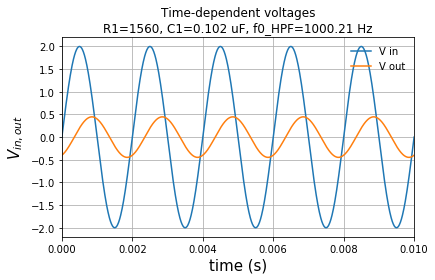

In [44]:
time = np.linspace(0,1,100000)
Vin = 2*np.sin(2*np.pi*500*time)
Vout = ampl*np.sin(2*np.pi*500*time - phase)

plt.plot(time,Vin,label='V in') 
plt.plot(time,Vout,label='V out')
plt.xlabel('time (s)',fontsize=15)
plt.ylabel('$V_{in,out}$',fontsize=15)
plt.grid()
plt.title('Time-dependent voltages\nR1=%s, C1=%3.5s uF, f0_HPF=%3.7s Hz'%(R1, C1*10**6,f0_HPF),fontsize=12)
plt.tight_layout() 
plt.legend(frameon=False,loc='best') 
plt.xlim(0,0.01)
# plt.savefig("HPF_Hfxn.png",dpi=400)

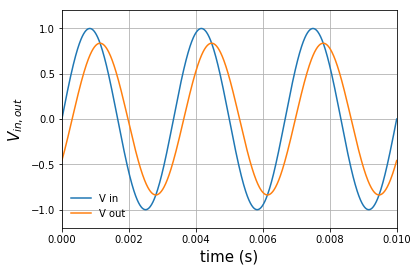

In [63]:
from IPython.html.widgets import interact

def plot_ACvoltages(amplitude=1.0, freq_spec=300, R1 = 1560):
    time = np.linspace(0,1,100000)
    Vin = amplitude*np.sin(2*np.pi*freq_spec*time)
    ZR1 = R1
    ZR2 = R2

    ZC1 = 1/(1j*omega*C1)
    ZC2 = 1/(1j*omega*C2)

    H_HPFcomplex = ZR1/(ZR1+ZC1)
    H_LPFcomplex = ZC2/(ZR2+ZC2)
    
#     freq_spec = 600
    H_HPF_real_specific = np.interp(freq_spec,freq,np.real(H_HPFcomplex))
    H_HPF_imag_specific = np.interp(freq_spec,freq,np.imag(H_HPFcomplex))
    phase_out = np.arctan(H_HPF_imag_specific/H_HPF_real_specific)
    amplitude_out = np.sqrt(H_HPF_real_specific**2 + H_HPF_imag_specific**2)
    Vout = amplitude*amplitude_out*np.sin(2*np.pi*freq_spec*time - phase_out)
    
    plt.ylim(-1.2, 1.2)
    plt.xlim(0,0.01)
#     x = np.linspace(0, 10, 1000)
    plt.plot(time,Vin,label='V in') 
    plt.plot(time,Vout,label='V out')
    plt.xlabel('time (s)',fontsize=15)
    plt.ylabel('$V_{in,out}$',fontsize=15)
    plt.grid()
    plt.legend(frameon=False,loc='best') 

interact(plot_ACvoltages, amplitude=(0.0, 1.0),freq_spec=(50,2000),R1=(1, 10000));


Next let's evaluate the HPF transfer function for a range of frequency values so that we can visualize in a plot:

In [54]:
# testing: how to take the real, imag part, and absolute value of a complex number:
complexnum = 3+4j
print('real part = %s'%(np.real(complexnum)))
print('imag part = %s'%(np.imag(complexnum)))
print('magnitude = %s'%(np.abs(complexnum)))

real part = 3.0
imag part = 4.0
magnitude = 5.0


In [55]:
# H_HPF_def = omega*R1*C1/np.sqrt(1+(omega*R1*C1)**2)

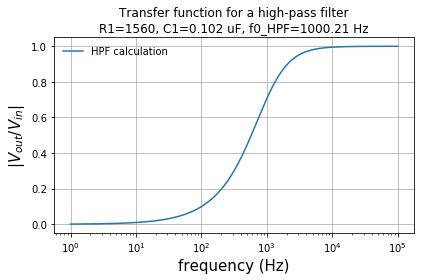

In [56]:
H_HPF = np.abs(H_HPFcomplex)

# plt.plot(freq,np.abs(H_HPF))   # regular plot -- both axes linear
plt.semilogx(freq,H_HPF,label='HPF calculation')  # semilog plot -- make the x-axis logarithmic
plt.xlabel('frequency (Hz)',fontsize=15)
plt.ylabel('$|V_{out}/V_{in}|$',fontsize=15)
plt.grid()
plt.title('Transfer function for a high-pass filter\nR1=%s, C1=%3.5s uF, f0_HPF=%3.7s Hz'%(R1, C1*10**6,f0_HPF),fontsize=12)
plt.tight_layout() 
plt.legend(frameon=False,loc='best') 
# plt.savefig("HPF_Hfxn.png",dpi=400)

Next plot the transfer function for a low-pass filter

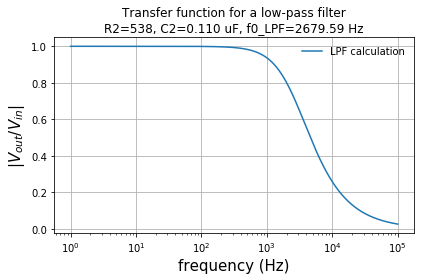

In [57]:
H_LPF = np.abs(H_LPFcomplex)

# plt.plot(freq,np.abs(H_HPF))   # regular plot -- both axes linear
plt.semilogx(freq,H_LPF,label='LPF calculation')  # semilog plot -- make the x-axis logarithmic
plt.xlabel('frequency (Hz)',fontsize=15)
plt.ylabel('$|V_{out}/V_{in}|$',fontsize=15)
plt.grid()
plt.title('Transfer function for a low-pass filter\nR2=%s, C2=%3.5s uF, f0_LPF=%3.7s Hz'%(R2, C2*10**6,f0_LPF),fontsize=12)
plt.tight_layout() 
plt.legend(frameon=False,loc='best') 
# plt.savefig("LPF_Hfxn.png",dpi=400)

Next we can import actual data and compare with experiment.

High-pass filter:

In [58]:
# user-modified area:
filename_HPF= 'bodeplotdata_chang6_good_expt.txt'

In [59]:
# import data
data_expt_HPF = np.genfromtxt(filename_HPF,skip_header=3)
frequency_expt_HPF = data_expt_HPF[:,0]
amplitude_dB_expt_HPF = data_expt_HPF[:,1]
amplitude_expt_HPF = 10**(amplitude_dB_expt_HPF/20)
phase_deg_expt_HPF = data_expt_HPF[:,2]

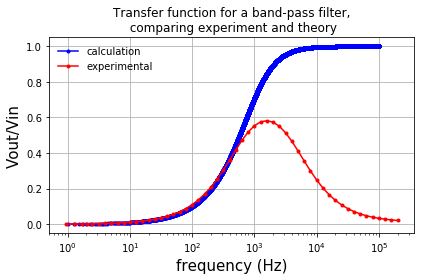

In [60]:
plt.semilogx(freq,H_HPF,'.-b',label='calculation')
plt.semilogx(frequency_expt_HPF,amplitude_expt_HPF,'.-r',label='experimental') # semilog plot -- make the x-axis logarithmic
plt.xlabel('frequency (Hz)',fontsize=15)
plt.ylabel('Vout/Vin',fontsize=15)
plt.grid()
plt.title('Transfer function for a band-pass filter,\n comparing experiment and theory',fontsize=12)
plt.tight_layout() 
plt.legend(frameon=False,loc=2) 
# plt.savefig("LPF_Hfxn.png",dpi=400)

Similar can be repeated for a low-pass filter.

In [62]:
# in case comparison with simulation is desired:
# user-modified area:
filename= 'Design1.bod'

# import data
data_sim = np.genfromtxt(filename,skip_header=15)
frequency_sim = data_sim[:,0]
amplitude_dB_sim = data_sim[:,1]
# amplitude = 10**(amplitude_dB/10)
amplitude_sim = data_sim[:,2]
phase_deg_sim = data_sim[:,3]